In [383]:
import pandas as pd
import os
import glob
from pathlib import Path
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
import math
from sklearn.metrics import confusion_matrix,roc_curve
import statsmodels.formula.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,multilabel_confusion_matrix
from scipy import interp
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB,MultinomialNB
%matplotlib inline

In [3]:
path = r'C:/Users/hp/Documents/Homework 3 Data/AReM/' # Path has to be set


files = [os.path.join(dir,file) for dir, dir_name, file_list in os.walk(path) for file in file_list if file.endswith('.csv') ]

In [4]:
df_activity = pd.DataFrame() # A data frame storing time domains features of various time series activities at different instances

In [5]:
df_activity

""


In [6]:
test_data_files = [f for f in files if 'test data' in f] # grouping test data together

In [7]:
train_data_files = [f for f in files if 'train data' in f] # grouping train data together

# Extracting Time Domain Features for Training Set,Test Set and Combined Dataset

In [8]:
train_data_files

['C:/Users/hp/Documents/Homework 3 Data/AReM/bending1\\train data\\dataset3.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/bending1\\train data\\dataset4.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/bending1\\train data\\dataset5.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/bending1\\train data\\dataset6.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/bending1\\train data\\dataset7.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/bending2\\train data\\dataset3.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/bending2\\train data\\dataset4.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/bending2\\train data\\dataset5.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/bending2\\train data\\dataset6.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/cycling\\train data\\dataset10.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/cycling\\train data\\dataset11.csv',
 'C:/Users/hp/Documents/Homework 3 Data/AReM/cycling\\train data\\dataset12.csv',
 'C:/Users/hp/Do

# Extracting time domain features

In [9]:
def time_domain_feature(instances):
    '''A function that returns time domain features for a time series in the form of a dataframe'''
    df_activity = pd.DataFrame()
    
    for i in range (len(instances)):
        data = pd.read_csv(instances[i],skiprows=4, usecols = list(range(1,8))) # reading csv files individually

        for j,col in enumerate(data.columns[1:7]):
            df_activity.loc[i,'min'+'_'+str(j+1)] = data.iloc[:,j].min() # extracting minimum value
            df_activity.loc[i,'max'+'_'+str(j+1)]  = data.iloc[:,j].max() # maximum value
            df_activity.loc[i,'mean'+'_'+str(j+1)]  = data.iloc[:,j].mean() # mean
            df_activity.loc[i,'median'+'_'+str(j+1)]  = data.iloc[:,j].median() # median
            df_activity.loc[i,'std' +'_'+str(j+1)]  = data.iloc[:,j].std() # standard deviation
            df_activity.loc[i,'1st quartile'+'_'+str(j+1)] = data.iloc[:,j].quantile(0.25) #q1
            df_activity.loc[i,'3rd quartile'+'_'+str(j+1)] = data.iloc[:,j].quantile(0.75) #q3
        df_activity.loc[i,'Activity'] = data['Activity'][0]
           
    return df_activity              

In [10]:
df_all = time_domain_feature(files) # combined features

In [11]:
df_train = time_domain_feature(train_data_files) # training set

In [12]:
df_train.shape

(69, 43)

In [13]:
df_test = time_domain_feature(test_data_files) # test set

In [14]:
df_test.shape

(19, 43)

In [15]:
df_test.head()

,min_1,max_1,mean_1,median_1,std_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,1st quartile_5,3rd quartile_5,min_6,max_6,mean_6,median_6,std_6,1st quartile_6,3rd quartile_6,Activity
0,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.00,0.0,1.30,0.358604,...,33.00,36.00,0.0,1.92,0.570583,0.43,0.582915,0.00,1.30,Bending1
1,38.00,45.67,42.812812,42.50,1.435550,42.0000,43.67,0.0,1.22,0.372438,...,32.00,34.50,0.0,3.11,0.571083,0.43,0.601010,0.00,1.30,Bending1
2,12.75,51.00,24.562958,24.25,3.737514,23.1875,26.50,0.0,6.87,0.590833,...,20.50,27.00,0.0,4.97,0.700188,0.50,0.693720,0.43,0.87,Bending2
3,0.00,42.75,27.464604,28.00,3.583582,25.5000,30.00,0.0,7.76,0.449708,...,15.00,20.75,0.0,6.76,1.122125,0.83,1.012342,0.47,1.30,Bending2
4,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,2.374208,...,17.95,21.75,0.0,9.34,2.921729,2.50,1.852600,1.50,3.90,Cycling


In [16]:
df_all.shape

(88, 43)

In [17]:
df_all.index+=1 # Making sure indexes start from 1

In [18]:
df_all.reset_index(inplace =True)


In [19]:

df_all.rename(columns ={"index":"Instance"},inplace=True) # Creating Instance column as specified

In [317]:
df_all.shape

(88, 44)

In [318]:
df_all.head()

,Instance,min_1,max_1,mean_1,median_1,std_1,1st quartile_1,3rd quartile_1,min_2,max_2,...,1st quartile_5,3rd quartile_5,min_6,max_6,mean_6,median_6,std_6,1st quartile_6,3rd quartile_6,Activity
0,1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,...,33.0000,36.00,0.0,1.92,0.570583,0.43,0.582915,0.0,1.30,Bending1
1,2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.67,0.0,1.22,...,32.0000,34.50,0.0,3.11,0.571083,0.43,0.601010,0.0,1.30,Bending1
2,3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,...,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.0,0.94,Bending1
3,4,33.00,47.75,42.179813,43.50,3.670666,39.15,45.00,0.0,3.00,...,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.0,1.00,Bending1
4,5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,...,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.0,0.50,Bending1


# ESTIMATING STANDARD DEVIATION FOR TIME DOMAIN FEATURES AND ITS 90% CONFIDENCE INTERVAL

In [21]:

def estimated_standard_deviation(feature):
    ''' A function which bootstraps a time domain feature in the dataset, estimates it's standard deviation and returns the 90%
     confidence interval of the estimated value
    '''
    est_std_deviation =[] # list to store estimated standard deviation for the time domain feature 1000 times
    
    for i in range(1000):
        
        sample = np.random.choice(df_all[feature],size =len(df_all[feature])) # resampling in order to create a bootstrap of sample size 1000
        standard_deviation = np.std(sample) # calculating it's standard deviation
        est_std_deviation.append (standard_deviation) # appending the estimated value to a list 
    std_deviation = np.mean(est_std_deviation) # in order to calculate the estimated standard deviation of the population we take the average of all values in the list
    est_std_deviation = sorted(est_std_deviation)
    bootstraped_ci =np.percentile(est_std_deviation,[5,95]) # calculating 90% confidence interval of estimated SD
    return bootstraped_ci,std_deviation



In [22]:
standard_deviation = [] # list to store estimated standard deviation for different time domain features in the dataset
confidence_interval = [] # list to store 90% CI of each estimated value
for features in df_all.columns[1:-1]: # iterating through the required features
    (bootstraped_ci,std_deviation) = estimated_standard_deviation(features) # invoking the function to calculate estimated SD and CI
    standard_deviation.append((features,std_deviation)) 
    confidence_interval.append(bootstraped_ci)

In [23]:
standard_deviation 

[('min_1', 9.433058721853852),
 ('max_1', 4.269256486594737),
 ('mean_1', 5.257526257190745),
 ('median_1', 5.376951582488455),
 ('std_1', 1.7476271154551142),
 ('1st quartile_1', 6.070000216333754),
 ('3rd quartile_1', 5.064900938438986),
 ('min_2', 0.0),
 ('max_2', 5.006743277995741),
 ('mean_2', 1.5506541133720209),
 ('median_2', 1.391425750273186),
 ('std_2', 0.8727188445155967),
 ('1st quartile_2', 0.9359718539989993),
 ('3rd quartile_2', 2.098840643751714),
 ('min_3', 2.9198573560371877),
 ('max_3', 4.817884088427745),
 ('mean_3', 3.942155271627993),
 ('median_3', 3.9723169819888007),
 ('std_3', 0.9264946136619524),
 ('1st quartile_3', 4.156951260559554),
 ('3rd quartile_3', 4.119193572588456),
 ('min_4', 0.0),
 ('max_4', 2.152220481539356),
 ('mean_4', 1.1522552331126126),
 ('median_4', 1.133523757959364),
 ('std_4', 0.45327206474600035),
 ('1st quartile_4', 0.8342763664318131),
 ('3rd quartile_4', 1.53390260011628),
 ('min_5', 5.973308947074533),
 ('max_5', 5.640318033555439),


In [24]:
confidence_interval

[array([ 8.23435645, 10.69272515]),
 array([3.25245275, 5.15633384]),
 array([4.67526671, 5.83609362]),
 array([4.79996692, 5.95705457]),
 array([1.55923584, 1.93813629]),
 array([5.55243856, 6.61092014]),
 array([4.28688423, 5.8323269 ]),
 array([0., 0.]),
 array([4.60876488, 5.38092651]),
 array([1.39204863, 1.68972793]),
 array([1.23008321, 1.53221698]),
 array([0.79867026, 0.93463572]),
 array([0.83506929, 1.03474783]),
 array([1.87537329, 2.27662113]),
 array([2.74324331, 3.08887783]),
 array([4.1292605 , 5.44410238]),
 array([3.38391734, 4.46459605]),
 array([3.37943265, 4.52865071]),
 array([0.75259031, 1.12747457]),
 array([3.57848479, 4.64604932]),
 array([3.51311241, 4.65214363]),
 array([0., 0.]),
 array([1.94438882, 2.33931661]),
 array([1.06294473, 1.21720807]),
 array([1.05197934, 1.19540332]),
 array([0.4202596 , 0.48322015]),
 array([0.77607706, 0.88391172]),
 array([1.42845232, 1.61798015]),
 array([4.36831828, 7.48896328]),
 array([4.73277951, 6.56723582]),
 array([4.

In [25]:
standard_deviation_values = [x[1] for x in standard_deviation] # storing the values of estimated standard deviation in a list
standard_deviation_index = [x[0] for x in standard_deviation]  # stroring the feature names

# Creating a DataFrame to display the estimated SD and corresponding confidence interval

In [26]:
df_estimated_deviation = pd.DataFrame(list(zip(standard_deviation_values, confidence_interval)),index = standard_deviation_index , columns =['Standard Deviation','90%CI'])

In [27]:
df_estimated_deviation

,Standard Deviation,90%CI
min_1,9.433059,"[8.234356452312568, 10.692725145305982]"
max_1,4.269256,"[3.2524527468545066, 5.1563338377396875]"
mean_1,5.257526,"[4.6752667139268, 5.8360936242075105]"
median_1,5.376952,"[4.799966924905114, 5.957054574059971]"
std_1,1.747627,"[1.5592358421815173, 1.938136291554989]"
1st quartile_1,6.070000,"[5.552438563643958, 6.610920139656002]"
3rd quartile_1,5.064901,"[4.286884227218913, 5.8323268951055525]"
min_2,0.000000,"[0.0, 0.0]"
max_2,5.006743,"[4.608764881671339, 5.380926505720749]"
mean_2,1.550654,"[1.3920486313963292, 1.689727933746553]"


# Selecting the 3 most important features from DataFrame



# Selecting Min, Mean and Max

In [28]:
imp_features = ['min','mean','max']

# Selecting the important features from train data

In [29]:
df_train.head()

,min_1,max_1,mean_1,median_1,std_1,1st quartile_1,3rd quartile_1,min_2,max_2,mean_2,...,1st quartile_5,3rd quartile_5,min_6,max_6,mean_6,median_6,std_6,1st quartile_6,3rd quartile_6,Activity
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.00,0.94,Bending1
1,33.00,47.75,42.179813,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00,Bending1
2,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50,Bending1
3,37.00,48.00,43.454958,43.25,1.386098,42.50,45.00,0.0,1.58,0.378083,...,22.2500,24.00,0.0,5.26,0.679646,0.50,0.622534,0.43,0.87,Bending1
4,36.25,48.00,43.969125,44.50,1.618364,43.31,44.67,0.0,1.50,0.413125,...,20.5000,23.75,0.0,2.96,0.555313,0.49,0.487826,0.00,0.83,Bending1


In [30]:
imp_cols= [cols for cols in df_train.columns.values if any (imp in cols for imp in imp_features)] # Extracting all important columns

In [31]:
imp_cols

['min_1',
 'max_1',
 'mean_1',
 'min_2',
 'max_2',
 'mean_2',
 'min_3',
 'max_3',
 'mean_3',
 'min_4',
 'max_4',
 'mean_4',
 'min_5',
 'max_5',
 'mean_5',
 'min_6',
 'max_6',
 'mean_6']

In [32]:
imp_cols.append('Activity') # for the purpose of classification

In [33]:
df_train_imp = df_train[imp_cols] # selecting only the important columns

In [34]:
df_train_imp.head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_3,max_3,mean_3,min_4,max_4,mean_4,min_5,max_5,mean_5,min_6,max_6,mean_6,Activity
0,35.00,47.40,43.954500,0.0,1.70,0.426250,6.50,29.75,22.122354,0.0,4.44,0.497313,29.00,38.50,35.588458,0.0,1.79,0.493292,Bending1
1,33.00,47.75,42.179813,0.0,3.00,0.696042,8.50,30.00,22.183625,0.0,5.15,0.989917,20.00,38.67,33.493917,0.0,2.18,0.613521,Bending1
2,33.00,45.75,41.678063,0.0,2.83,0.535979,3.00,28.25,19.006562,0.0,6.42,0.841875,23.67,37.50,29.857083,0.0,1.79,0.383292,Bending1
3,37.00,48.00,43.454958,0.0,1.58,0.378083,5.75,27.00,15.793333,0.0,10.03,0.849354,8.00,33.50,23.034792,0.0,5.26,0.679646,Bending1
4,36.25,48.00,43.969125,0.0,1.50,0.413125,1.50,26.33,15.868021,0.0,5.17,0.666354,11.33,30.75,22.103750,0.0,2.96,0.555313,Bending1


In [35]:
df_train_imp['Activity'] =  df_train_imp['Activity'].apply(lambda x : 1  if x=='Bending1' or x =='Bending2' else 0)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:

df_train_imp.head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_3,max_3,mean_3,min_4,max_4,mean_4,min_5,max_5,mean_5,min_6,max_6,mean_6,Activity
0,35.00,47.40,43.954500,0.0,1.70,0.426250,6.50,29.75,22.122354,0.0,4.44,0.497313,29.00,38.50,35.588458,0.0,1.79,0.493292,1
1,33.00,47.75,42.179813,0.0,3.00,0.696042,8.50,30.00,22.183625,0.0,5.15,0.989917,20.00,38.67,33.493917,0.0,2.18,0.613521,1
2,33.00,45.75,41.678063,0.0,2.83,0.535979,3.00,28.25,19.006562,0.0,6.42,0.841875,23.67,37.50,29.857083,0.0,1.79,0.383292,1
3,37.00,48.00,43.454958,0.0,1.58,0.378083,5.75,27.00,15.793333,0.0,10.03,0.849354,8.00,33.50,23.034792,0.0,5.26,0.679646,1
4,36.25,48.00,43.969125,0.0,1.50,0.413125,1.50,26.33,15.868021,0.0,5.17,0.666354,11.33,30.75,22.103750,0.0,2.96,0.555313,1


# Selecting time domain features for time series  1,2 and 6  of each instance

In [37]:
required = ['1','2','6','Activity']
req_cols = [cols for cols in df_train_imp if any(val in cols for val in required)]

In [38]:
df_train_imp_subset = df_train_imp[req_cols]

In [39]:

df_train_imp_subset.head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_6,max_6,mean_6,Activity
0,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,1
1,33.00,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,1
2,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,1
3,37.00,48.00,43.454958,0.0,1.58,0.378083,0.0,5.26,0.679646,1
4,36.25,48.00,43.969125,0.0,1.50,0.413125,0.0,2.96,0.555313,1


# Making scatter plots of features selected from time series 1,2 and 6 of each instance

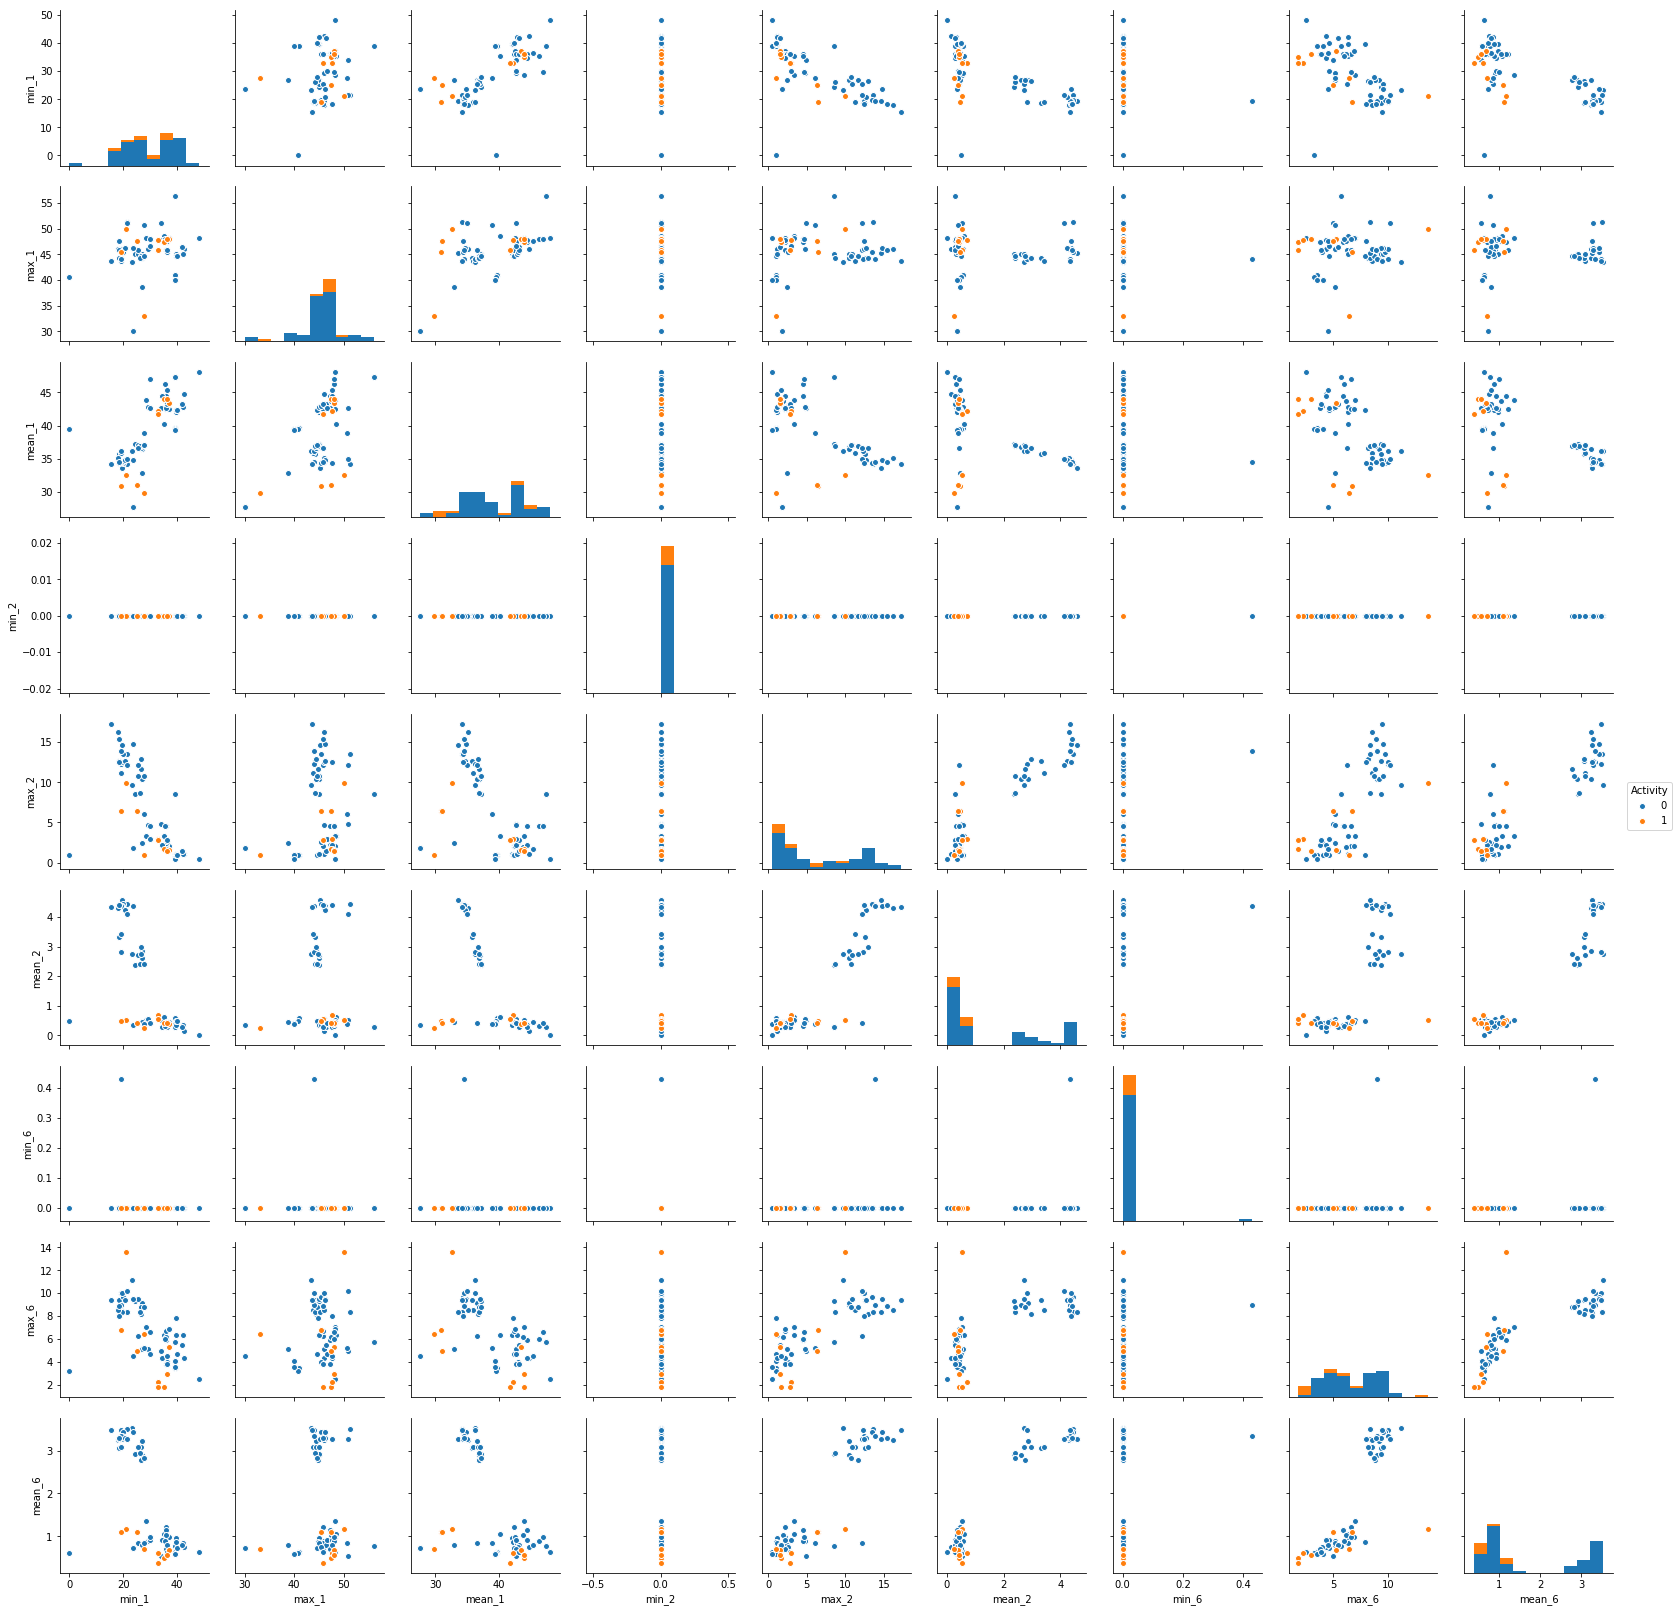

In [40]:
sns.pairplot(df_train_imp_subset,hue ='Activity',vars= df_train_imp_subset.columns[:-1])

# Splitting each time series into two equal length time series and extracting time domain features for the same

In [41]:
df_split_series = pd.DataFrame()
for i in range (len(train_data_files)):
    temp = pd.read_csv(train_data_files[i],skiprows=4, usecols = list(range(1,8)))
    temp_split_1 = temp.iloc[:len(temp)//2] # selecting first half of training set
    temp_split_2 = temp.iloc[len(temp)//2:] # selecting second half of training set
    temp_split_2.reset_index(inplace=True) # Resetting index
    temp_split_2.drop(['index'],axis =1,inplace = True)
    temp = pd.concat([temp_split_1,temp_split_2],axis = 1) # concatenating values column wise
    temp.dropna(inplace=True)
    counter = 0
    temp_cols = temp.select_dtypes(include=['float64']) # selecting only columns having float values
    
    for j in  range (len(temp_cols.columns)):
    
            df_split_series.loc[i,'min'+'_'+str(j+1)] = temp_cols.iloc[:,j].min()
            df_split_series.loc [i,'max'+'_'+str(j+1)] = temp_cols.iloc[:,j].max()
            df_split_series.loc [i,'mean'+'_'+str(j+1)] = temp_cols.iloc[:,j].mean()
    df_split_series.loc[i,'Activity'] = temp_split_1['Activity'][0] # Activity Column




    

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [42]:
df_split_series['Activity'] =  df_split_series['Activity'].apply(lambda x : 1  if x=='Bending1' or x =='Bending2' else 0)

In [43]:
df_split_series.head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_3,max_3,mean_3,min_4,...,min_10,max_10,mean_10,min_11,max_11,mean_11,min_12,max_12,mean_12,Activity
0,36.50,46.50,44.057167,0.0,1.50,0.381042,14.25,29.25,23.096792,0.0,...,0.0,4.44,0.501167,29.00,38.25,34.883375,0.0,1.50,0.388333,1
1,33.75,47.75,43.278875,0.0,3.00,0.673292,11.00,30.00,23.141250,0.0,...,0.0,5.15,1.171792,20.00,38.50,30.965708,0.0,2.18,0.586083,1
2,33.00,45.75,41.621208,0.0,2.83,0.623083,3.00,28.25,19.081458,0.0,...,0.0,2.35,0.568667,26.00,36.00,29.635833,0.0,1.50,0.347500,1
3,39.00,48.00,44.117042,0.0,1.30,0.250042,6.25,27.00,17.744167,0.0,...,0.0,5.21,0.575708,8.00,26.00,22.850875,0.0,4.06,0.543875,1
4,36.67,45.00,43.486208,0.0,1.30,0.378667,4.00,26.33,16.397250,0.0,...,0.0,3.56,0.669750,13.75,26.00,21.882042,0.0,2.96,0.585750,1


In [44]:
required = ['1','2','12','Activity'] # As per the question only time series 1,2 and 12 is required
req_cols = [cols for cols in df_split_series if any(val in cols for val in required)]

In [45]:
df_split_series_imp =df_split_series[req_cols]

In [46]:
df_split_series_imp.head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_10,max_10,mean_10,min_11,max_11,mean_11,min_12,max_12,mean_12,Activity
0,36.50,46.50,44.057167,0.0,1.50,0.381042,0.0,4.44,0.501167,29.00,38.25,34.883375,0.0,1.50,0.388333,1
1,33.75,47.75,43.278875,0.0,3.00,0.673292,0.0,5.15,1.171792,20.00,38.50,30.965708,0.0,2.18,0.586083,1
2,33.00,45.75,41.621208,0.0,2.83,0.623083,0.0,2.35,0.568667,26.00,36.00,29.635833,0.0,1.50,0.347500,1
3,39.00,48.00,44.117042,0.0,1.30,0.250042,0.0,5.21,0.575708,8.00,26.00,22.850875,0.0,4.06,0.543875,1
4,36.67,45.00,43.486208,0.0,1.30,0.378667,0.0,3.56,0.669750,13.75,26.00,21.882042,0.0,2.96,0.585750,1


In [47]:
df_split_series_imp.drop(['min_10','max_10','mean_10','min_11','max_11','mean_11'],axis =1,inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_split_series_imp.head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_12,max_12,mean_12,Activity
0,36.50,46.50,44.057167,0.0,1.50,0.381042,0.0,1.50,0.388333,1
1,33.75,47.75,43.278875,0.0,3.00,0.673292,0.0,2.18,0.586083,1
2,33.00,45.75,41.621208,0.0,2.83,0.623083,0.0,1.50,0.347500,1
3,39.00,48.00,44.117042,0.0,1.30,0.250042,0.0,4.06,0.543875,1
4,36.67,45.00,43.486208,0.0,1.30,0.378667,0.0,2.96,0.585750,1


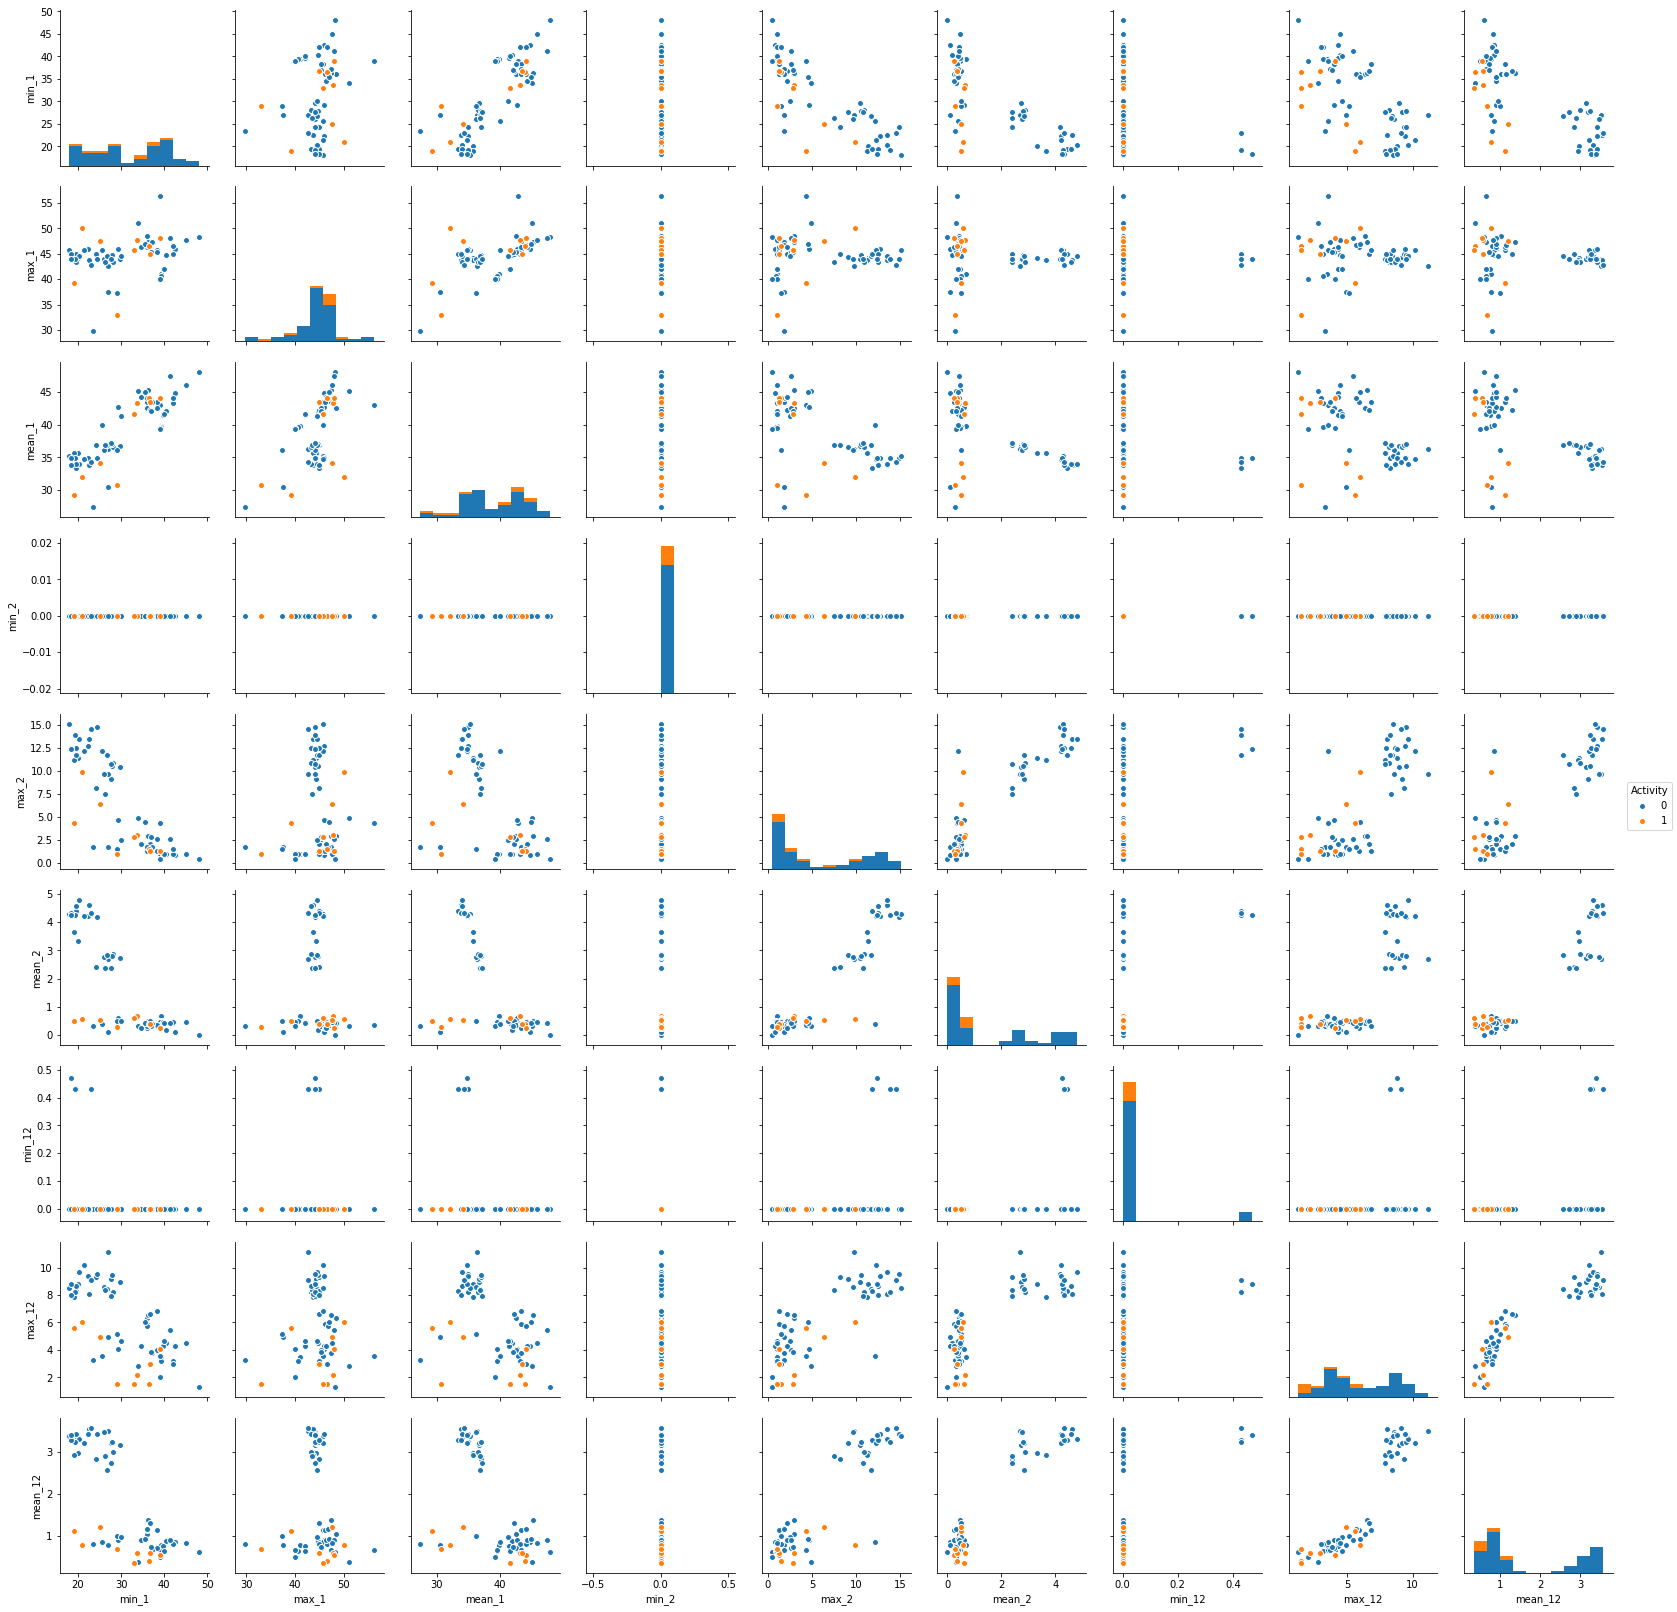

In [49]:
sns.pairplot(df_split_series_imp,hue ='Activity',vars =df_split_series_imp.columns[:-1])

# Both scatterplots look identical and there's no discernable difference

# Splitting the data frame into l {1,2...20} equal time series and extracting time domain features for the same

In [50]:
def split_data(split_size,file =train_data_files):
'''inputs are number of time series to split the data frame into and the dataframe outputs dataframe with the time domain features of the time series'''
    df_split = pd.DataFrame() # dataframe to store the time series splits
   
    for i in range (len(file)):
        result = pd.DataFrame()
        temp = pd.read_csv(file[i],skiprows=4, usecols = list(range(1,8))) # reading files individually
        
        df =np.array_split(temp,split_size) # splitting the dataframe
        
        for val in df:
            result = pd.concat([result,val.reset_index(drop=True)],axis =1) # concatenating the dataframes columnwise which increases the number of features
        result.dropna(inplace=True) # Dropping null rows
       


        temp_cols = result.select_dtypes(include=['float64']) # selecting columns having float values

        for j in  range (len(temp_cols.columns)): # Extracting min,max and mean of each column

                df_split.loc[i,'min'+'_'+str(j+1)] = temp_cols.iloc[:,j].min()
                df_split.loc[i,'max'+'_'+str(j+1)] = temp_cols.iloc[:,j].max()
                df_split.loc[i,'mean'+'_'+str(j+1)] = temp_cols.iloc[:,j].mean()
               
        df_split.loc[i,'Activity'] = temp['Activity'][0] # Storing Activity for each split
        temp = temp.iloc[0:0] # making temp empty
                
                
        
        
    return df_split

    
   

In [51]:
l = [] # list to store all dataframes having no of splits ranging from 1 to 20
for i in list(range(1,21)):
    l.append(split_data(i))

In [60]:
for df in l:
    df['Activity'] = df['Activity'].apply(lambda x: 1 if x=='Bending1' or x=='Bending2' else 0)

In [61]:
l[0].head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_3,max_3,mean_3,min_4,max_4,mean_4,min_5,max_5,mean_5,min_6,max_6,mean_6,Activity
0,35.00,47.40,43.954500,0.0,1.70,0.426250,6.50,29.75,22.122354,0.0,4.44,0.497313,29.00,38.50,35.588458,0.0,1.79,0.493292,1
1,33.00,47.75,42.179813,0.0,3.00,0.696042,8.50,30.00,22.183625,0.0,5.15,0.989917,20.00,38.67,33.493917,0.0,2.18,0.613521,1
2,33.00,45.75,41.678063,0.0,2.83,0.535979,3.00,28.25,19.006562,0.0,6.42,0.841875,23.67,37.50,29.857083,0.0,1.79,0.383292,1
3,37.00,48.00,43.454958,0.0,1.58,0.378083,5.75,27.00,15.793333,0.0,10.03,0.849354,8.00,33.50,23.034792,0.0,5.26,0.679646,1
4,36.25,48.00,43.969125,0.0,1.50,0.413125,1.50,26.33,15.868021,0.0,5.17,0.666354,11.33,30.75,22.103750,0.0,2.96,0.555313,1


In [411]:
best_features_without_regularization = {}
score = {}
for i in range (len(l)):
    lr = LogisticRegression(C=10**5,solver='liblinear') # Removing Regularization
    


    X_train = l[i].iloc[:,:-1] # Considering the features except label
    y_train = l[i].iloc[:,-1] # The label

    rfecv = RFECV(lr,cv =StratifiedKFold(5),scoring = 'accuracy') # Using Stratified CV and RFE to select best features
    rfecv.fit(X_train,y_train)
    names = [] # temp list to store best features
    for j,col in enumerate(X_train.columns):
        if rfecv.support_[j] == True:
            names.append(col)
   
    score[i+1] =max(rfecv.grid_scores_) # maximum grid_scores will for each split
    best_features_without_regularization[i+1] = names # storing the best features for each split


In [412]:
score

{1: 1.0,
 2: 0.9857142857142858,
 3: 0.9857142857142858,
 4: 0.9714285714285715,
 5: 0.9714285714285715,
 6: 0.9714285714285715,
 7: 0.9857142857142858,
 8: 0.9560439560439562,
 9: 0.9714285714285715,
 10: 0.9714285714285715,
 11: 0.9714285714285715,
 12: 0.9714285714285715,
 13: 0.9857142857142858,
 14: 0.9857142857142858,
 15: 0.9571428571428571,
 16: 0.9857142857142858,
 17: 0.9714285714285715,
 18: 0.9857142857142858,
 19: 0.9857142857142858,
 20: 0.9846153846153847}

# best value of l = 1

In [413]:
best_features_without_regularization[1]

['mean_1', 'max_2', 'mean_3', 'min_5', 'max_5', 'mean_5']

# Therefore using RFE the best value of l is 1 and the optimum number of features is 6

# The right way to perform cross validation is as follows: first we perform cross validation to select the best features, and then fit the model using the selected features using logistic regression and find out the cross validation score . The Wrong way would be to select the features having highest correlation with the output first and then choosing a model such as logistic regression and applying cross validation

# Reporting confusion matrix and roc and auc on train data

In [727]:
X_train_without_regularization = l[0][best_features_without_regularization[1]]
# selecting the best features for the train data
y_train_without_regularization = l[0]['Activity']


In [728]:
lr = LogisticRegression(C=10**5,solver='liblinear')
lr.fit(X_train_without_regularization,y_train_without_regularization)
preds_train = lr.predict(X_train_without_regularization)

In [729]:
confusion_matrix(preds_train,y_train_without_regularization)

array([[60,  0],
       [ 0,  9]], dtype=int64)

In [731]:
fpr_train, tpr_train, thresholds = roc_curve(y_train_without_regularization, preds_train) # getting False positive rate, true positive rate which is required for plotting the roc curve

In [732]:
tpr_train


array([0., 1., 1.])

In [733]:
fpr_train

array([0., 0., 1.])

In [734]:
thresholds

array([2, 1, 0], dtype=int64)

In [735]:
auc_train = sklearn.metrics.auc(fpr_train,tpr_train)

In [736]:
auc_train

1.0

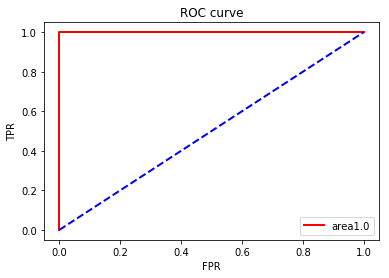

In [737]:
plt.figure()
##Adding the ROC
plt.plot(fpr_train, tpr_train, color='red',
 lw=2, label='area{}'.format(auc_train))
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()


In [740]:

model =sm.Logit(y_train_without_regularization,X_train_without_regularization).fit(maxiter=10)
model.summary2()

         Current function value: 0.000015
         Iterations: 10


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            No. Iterations:   10.0000   
Dependent Variable: Activity         Pseudo R-squared: 1.000     
Date:               2019-10-13 18:46 AIC:              14.0020   
No. Observations:   69               BIC:              29.6408   
Df Model:           6                Log-Likelihood:   -0.0010221
Df Residuals:       62               LL-Null:          -26.718   
Converged:          0.0000           Scale:            1.0000    
------------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|     [0.025    0.975] 
------------------------------------------------------------------
mean_1     -0.1934    4.3739  -0.0442  0.9647    -8.7660    8.3792
max_2      -0.0586    8.5983  -0.0068  0.9946   -16.9110   16.7938
mean_3      0.1206   11.9047   0.0101  0.9919   -23.2122   23.4534
min_5      -0.0068   11.4257  -0.0006  0.9995   -22.4007   22.3872
max_5      -0.2798   10.3608  -0.0270  0.9785   -20.5865   20.0269
mean_5      0.0831   14.4893   0.0057  0.9954   -28.3154   28.4815
Activity   24.9618  188.7253   0.1323  0.8948  -344.9329  394.8565
=================================================================

"""

# This case is linearly separable and in such cases loistic regression can't estimate the value of coefficients they tend to infinity

# Now using the classifier on the test set and breaking it into the same number of features as training set. We found using stratified k fold validation that the the optimum value of l=1

In [428]:
df_test = split_data(1,test_data_files)

In [429]:
df_test.shape

(19, 19)

In [430]:
df_test['Activity'] = df_test['Activity'].apply(lambda x : 1 if x == 'Bending1' or x =='Bending2' else 0)

In [432]:
X_test = df_test[best_features_without_regularization[1]]
y_test = df_test['Activity']

In [433]:
X_test.head()

,mean_1,max_2,mean_3,min_5,max_5,mean_5
0,40.624792,1.30,19.040937,27.25,38.25,34.311292
1,42.812812,1.22,20.096979,27.67,38.50,33.024583
2,24.562958,6.87,19.121333,10.67,30.00,23.493042
3,27.464604,7.76,20.842542,0.00,33.00,17.617937
4,37.177042,8.58,16.531083,7.00,25.50,19.607250


In [434]:
y_test.head()

0    1
1    1
2    1
3    1
4    0
Name: Activity, dtype: int64

In [435]:
preds_test = lr.predict(X_test)

In [436]:
lr.score(X_test,y_test)

1.0

In [438]:
confusion_matrix(preds_test,y_test)

array([[15,  0],
       [ 0,  4]], dtype=int64)

# Cross Validation score = score on test set =1, this is a linearly separable case

# In this case the classes are well separated and hence cause instability in estimating linear regression parameters

# Performing downsampling in order to make sure control case ratio is 5 to 1

In [440]:
best_features_without_regularization[1].append('Activity')

In [441]:
best_features_without_regularization[1]

['mean_1', 'max_2', 'mean_3', 'min_5', 'max_5', 'mean_5', 'Activity']

In [442]:
train_data = l[1][best_features_without_regularization[1]]

In [443]:
train_data['Activity'].value_counts()

0    60
1     9
Name: Activity, dtype: int64

# Case = 9 Control = 60 , we downsample number of controls to 45


In [444]:
non_bending_indices = train_data[train_data['Activity']==0].index
no_of_samples = 45

In [445]:
random_sample = np.random.choice(non_bending_indices,no_of_samples,replace=False)

In [446]:
random_sample # under sampled indexes of non bending activity

array([67, 59, 35, 15, 12, 28, 11, 30, 22, 66, 10, 29, 20, 14, 41, 26, 18,
       19, 42, 51, 46, 24, 37, 44, 32,  9, 13, 53, 63, 60, 54, 36, 25, 68,
       65, 55, 17, 50, 49, 40, 57, 21, 48, 16, 45], dtype=int64)

In [447]:
bending_indices = train_data[train_data['Activity']==1].index

In [448]:
under_sample_indices = np.concatenate([random_sample,bending_indices])

In [449]:
train_data_under_sampled = train_data.loc[under_sample_indices]

In [450]:
train_data_under_sampled['Activity'].value_counts()

0    45
1     9
Name: Activity, dtype: int64

# Fitting logistic regression model on the same

In [452]:
X_train = train_data_under_sampled.drop(['Activity'],axis =1)
y_train = train_data_under_sampled['Activity']

In [453]:
lr = LogisticRegression(C=10**5)
lr.fit(X_train,y_train)
preds_case_control = lr.predict(X_test)

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [455]:
confusion_matrix(preds_case_control,y_test)

array([[15,  0],
       [ 0,  4]], dtype=int64)

In [456]:
print(classification_report(preds_case_control,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         4

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [457]:
fpr_test,tpr_test,thresholds = roc_curve(y_test,preds_case_control)

In [460]:
fpr_test

array([0., 0., 1.])

In [461]:
tpr_test

array([0., 1., 1.])

In [469]:
auc_test = sklearn.metrics.auc(fpr_test,tpr_test)

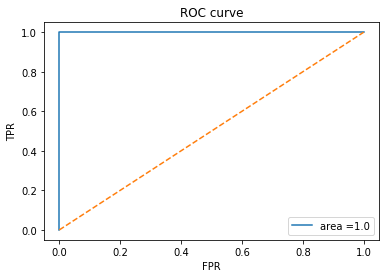

In [470]:
plt.plot(fpr,tpr,label = 'area ={}'.format(auc_test))
plt.plot([0,1],[0,1],linestyle = '--')
plt.xlabel('FPR')
plt.ylabel ('TPR')
plt.title ('ROC curve')
plt.legend()

# Binary Classification using L1 regularization

# Normalizing the features for all different splits of time series

In [101]:
def normalize_data(df):
    x = MinMaxScaler().fit_transform(df.drop(['Activity'],axis =1))
    cols = df.columns[:-1]
    y = df['Activity']
    df =pd.DataFrame(x,columns=cols)
    df ['Activity'] = y
    return df

In [189]:
normalized_dataframes = []
for i in range(len(l)):
    normalized_dataframes.append( normalize_data(l[i]))
    

In [190]:
normalized_dataframes[0].head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_3,max_3,mean_3,min_4,max_4,mean_4,min_5,max_5,mean_5,min_6,max_6,mean_6,Activity
0,0.729167,0.662857,0.800389,0.0,0.075550,0.091715,0.764706,0.859944,0.996558,0.0,0.218365,0.054478,1.000000,0.935404,1.000000,0.0,0.000000,0.034952,1
1,0.687500,0.676190,0.712913,0.0,0.152885,0.150758,1.000000,0.871615,1.000000,0.0,0.297872,0.216876,0.689655,0.941405,0.933049,0.0,0.032995,0.073153,1
2,0.687500,0.600000,0.688182,0.0,0.142772,0.115729,0.352941,0.789916,0.821528,0.0,0.440090,0.168071,0.816207,0.900106,0.816798,0.0,0.000000,0.000000,1
3,0.770833,0.685714,0.775766,0.0,0.068412,0.081174,0.676471,0.731559,0.641023,0.0,0.844345,0.170537,0.275862,0.758913,0.598725,0.0,0.293570,0.094164,1
4,0.755208,0.685714,0.801110,0.0,0.063653,0.088843,0.176471,0.700280,0.645219,0.0,0.300112,0.110207,0.390690,0.661843,0.568965,0.0,0.098985,0.054658,1


In [621]:
best_Cs = {}
scores_splits = {}
for i in range(len(normalized_dataframes)):
    X_train = normalized_dataframes[i].iloc[:,:-1] # Considering the features except label
    y_train = normalized_dataframes[i].iloc[:,-1] # The label


    lr = LogisticRegression(penalty='l1',solver='liblinear')
    C = np.logspace(0,4,10)
    hyperparameters = dict(C=C)
    clf = GridSearchCV(lr,hyperparameters,cv=StratifiedKFold(5)) # finding best value of C using crossvalidation
    best_model = clf.fit(X_train,y_train)
    best_c =best_model.best_estimator_.get_params()['C']
    lr = LogisticRegression(penalty='l1',C=best_c,solver='liblinear')
    model = lr.fit(X_train,y_train)
    scores_splits [i+1] = cross_val_score(lr,X_train,y_train,cv = StratifiedKFold(5)).mean() #cross validation score for each value of l
    best_Cs[i+1] = best_c

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-

In [622]:
scores_splits

{1: 0.9714285714285715,
 2: 0.9285714285714286,
 3: 0.9857142857142858,
 4: 0.9571428571428571,
 5: 0.8989010989010989,
 6: 0.9131868131868132,
 7: 0.9428571428571428,
 8: 0.8857142857142858,
 9: 0.9142857142857143,
 10: 0.8846153846153847,
 11: 0.9131868131868133,
 12: 0.9131868131868132,
 13: 0.9131868131868132,
 14: 0.9131868131868132,
 15: 0.8846153846153847,
 16: 0.8989010989010989,
 17: 0.9131868131868132,
 18: 0.8989010989010989,
 19: 0.9131868131868132,
 20: 0.8989010989010989}

In [623]:
best_Cs

{1: 7.742636826811269,
 2: 1291.5496650148827,
 3: 59.94842503189409,
 4: 21.544346900318832,
 5: 2.7825594022071245,
 6: 1.0,
 7: 2.7825594022071245,
 8: 166.81005372000593,
 9: 7.742636826811269,
 10: 464.15888336127773,
 11: 1291.5496650148827,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 3593.813663804626,
 16: 1.0,
 17: 2.7825594022071245,
 18: 1.0,
 19: 2.7825594022071245,
 20: 1.0}

# Selecting the best value of l

In [473]:
print(sorted(scores_splits.items(),key =lambda x:x[1],reverse=True)[0])

(1, 0.9714285714285715)


# Therefore l =1

In [624]:
best_Cs[1]

7.742636826811269

# Using the obtained value of l to fit logistic regression model using L1 penalty with the obtained value of c

In [625]:
x_train_l1 = normalized_dataframes[0].drop(['Activity'],axis =1)
y_train_l1 = normalized_dataframes[0]['Activity']
l1_logreg = LogisticRegression(penalty='l1',solver='liblinear',C=best_Cs[1])
model = l1_logreg.fit(x_train_l1,y_train_l1)

In [628]:
preds_l1= model.predict(x_train_l1)
confusion_matrix(preds_l1,y_train_l1)

array([[60,  0],
       [ 0,  9]], dtype=int64)

In [630]:
print(classification_report(preds_l1,y_train_l1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00         9

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



# We see that the precision for both classes is 1

# Using test set to make predicitions

In [631]:
df_test = split_data(1,test_data_files)
df_test = normalize_data(df_test)
X_test_l1 = df_test.drop(['Activity'],axis = 1).values
y_test_l1 = df_test['Activity'].apply(lambda x : 1 if x=='Bending1' or x=='Bending2' else 0)

In [632]:
X_test_l1.shape

(19, 18)

In [633]:
preds_l1 =l1_logreg.predict(X_test_l1)

In [634]:
print (confusion_matrix(preds_l1,y_test_l1))

[[15  0]
 [ 0  4]]


In [635]:
print(classification_report(preds_l1,y_test_l1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         4

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



# ROC curve for the predictions

In [636]:
fpr_l1,tpr_l1,thresholds= roc_curve(y_test_l1,preds_l1)


In [637]:
auc_l1 =sklearn.metrics.auc(fpr_l1,tpr_l1)

In [638]:
fpr_l1

array([0., 0., 1.])

In [639]:
thresholds

array([2, 1, 0], dtype=int64)

In [640]:
tpr_l1

array([0., 1., 1.])

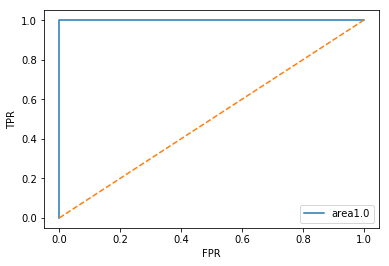

In [641]:
plt.plot(fpr_l1,tpr_l1,label='area{}'.format(auc_l1))
plt.plot([0,1],[0,1],linestyle='--')
plt.legend(loc ='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# From the classification report we see that f1 score for cross validation is 1 for both train and test data and even in case of l1 regularization it is the same. Hence both models perform well. But it's easier to implement l1 regularization as it automatically does feature selection for us

# Multiclass Classification

In [565]:
multiclass_dataframe = []
for i in range(1,21):
    multiclass_dataframe.append(split_data(i))
    

In [566]:
multiclass_dataframe[0]['Activity'].value_counts()

Walking     12
Standing    12
Lying       12
Sitting     12
Cycling     12
Bending1     5
Bending2     4
Name: Activity, dtype: int64

In [567]:
d ={'Bending1':0,'Bending2':0,'Cycling':1,'Lying':2,'Sitting':3,'Standing':4,'Walking':5} # used for label encoding

In [568]:
for df in multiclass_dataframe:
    df['Activity'].replace(d,inplace =True)

In [569]:
multiclass_dataframe[0]['Activity'].value_counts()

5    12
4    12
3    12
2    12
1    12
0     9
Name: Activity, dtype: int64

In [570]:
normalized_multiclass_dataframes = []

In [571]:
for i in range (len(multiclass_dataframe)):
       normalized_multiclass_dataframes.append(normalize_data(multiclass_dataframe[i])) # normalizing 

In [572]:
normalized_multiclass_dataframes[0].head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_3,max_3,mean_3,min_4,max_4,mean_4,min_5,max_5,mean_5,min_6,max_6,mean_6,Activity
0,0.729167,0.662857,0.800389,0.0,0.075550,0.091715,0.764706,0.859944,0.996558,0.0,0.218365,0.054478,1.000000,0.935404,1.000000,0.0,0.000000,0.034952,0
1,0.687500,0.676190,0.712913,0.0,0.152885,0.150758,1.000000,0.871615,1.000000,0.0,0.297872,0.216876,0.689655,0.941405,0.933049,0.0,0.032995,0.073153,0
2,0.687500,0.600000,0.688182,0.0,0.142772,0.115729,0.352941,0.789916,0.821528,0.0,0.440090,0.168071,0.816207,0.900106,0.816798,0.0,0.000000,0.000000,0
3,0.770833,0.685714,0.775766,0.0,0.068412,0.081174,0.676471,0.731559,0.641023,0.0,0.844345,0.170537,0.275862,0.758913,0.598725,0.0,0.293570,0.094164,0
4,0.755208,0.685714,0.801110,0.0,0.063653,0.088843,0.176471,0.700280,0.645219,0.0,0.300112,0.110207,0.390690,0.661843,0.568965,0.0,0.098985,0.054658,0


# Finding the best value of l for multiclass classification using l1 penalized logistic regression

In [642]:
best_Cs_multiclass = {} #storing best c for each class
scores_splits_multiclass = {} # cv score for each split
for i in range(len(normalized_multiclass_dataframes)):
    X_train = normalized_multiclass_dataframes[i].iloc[:,:-1] # Considering the features except label
    y_train = normalized_multiclass_dataframes[i].iloc[:,-1] # The label


    lr = LogisticRegression(penalty='l1',solver='liblinear')
    C = np.logspace(0,4,10)
    hyperparameters = dict(C=C)
    clf = GridSearchCV(lr,hyperparameters,cv=StratifiedKFold(5)) # using cv to find best c
    best_model = clf.fit(X_train,y_train)
    best_c =best_model.best_estimator_.get_params()['C']
    lr = LogisticRegression(penalty='l1',C=best_c,solver='liblinear')
    model = lr.fit(X_train,y_train)
    scores_splits_multiclass [i+1] = cross_val_score(lr,X_train,y_train,cv = StratifiedKFold(5)).mean() # cv to find best l
    best_Cs_multiclass[i+1] = best_c

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\A

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. Thi

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. Thi

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

In [643]:
scores_splits_multiclass

{1: 0.8165775401069519,
 2: 0.8196078431372549,
 3: 0.7847593582887701,
 4: 0.7960784313725491,
 5: 0.7896613190730838,
 6: 0.743048128342246,
 7: 0.7690730837789661,
 8: 0.7464349376114082,
 9: 0.7449197860962566,
 10: 0.7626559714795008,
 11: 0.7646167557932264,
 12: 0.781283422459893,
 13: 0.7524064171122995,
 14: 0.7180035650623886,
 15: 0.7111408199643494,
 16: 0.7812834224598931,
 17: 0.7631016042780748,
 18: 0.7444741532976827,
 19: 0.793048128342246,
 20: 0.7695187165775401}

# Best l

In [644]:
print(sorted(scores_splits_multiclass.items(),key =lambda x:x[1],reverse=True)[0])

(2, 0.8196078431372549)


In [645]:
best_Cs_multiclass[2]

2.7825594022071245

# Therefore best value of l=2. We use this to fit our logistic regression model again

In [646]:
X_train_multiclass = normalized_multiclass_dataframes[1].drop(['Activity'],axis =1)
y_train = normalized_multiclass_dataframes[1]['Activity']
lr = LogisticRegression(penalty='l1',solver = 'liblinear',C=best_Cs[2])
model =lr.fit(X_train_multiclass,y_train)

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [647]:
model.score(X_train_multiclass,y_train)

1.0

In [648]:
df_test_multiclass = split_data(2,test_data_files)
df_test_multiclass = normalize_data(df_test_multiclass)

In [649]:
df_test_multiclass

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_3,max_3,mean_3,min_4,...,min_10,max_10,mean_10,min_11,max_11,mean_11,min_12,max_12,mean_12,Activity
0,0.716312,0.592000,0.697583,0.0,0.062599,0.081788,0.533333,0.921455,0.811797,0.0,...,0.0,0.443570,0.240956,0.984821,0.991228,1.000000,0.0,0.074519,0.009619,Bending1
1,0.822695,0.682353,0.770307,0.0,0.040412,0.077267,0.933333,0.896727,1.000000,0.0,...,0.0,0.477690,0.251794,1.000000,1.000000,0.943140,0.0,0.217548,0.003158,Bending1
2,0.000000,1.000000,0.000000,0.0,0.510301,0.169037,0.366667,0.896727,0.879900,0.0,...,0.0,0.608924,0.168781,0.385616,0.587719,0.574638,0.0,0.441106,0.143387,Bending2
3,0.390071,0.074353,0.188471,0.0,0.064976,0.050187,1.000000,0.800000,0.934264,0.0,...,0.0,0.346457,0.210328,0.000000,0.807018,0.455470,0.0,0.656250,0.329857,Bending2
4,0.326241,0.717647,0.526409,0.0,0.614105,0.523024,0.733333,1.000000,0.773345,0.0,...,0.0,0.749344,0.819238,0.424648,0.508772,0.546960,0.0,0.966346,0.804375,Cycling
5,0.468085,0.705882,0.553762,0.0,0.675119,0.461544,0.889333,0.800000,0.709089,0.0,...,0.0,0.813648,0.842250,0.379472,0.502807,0.551042,0.0,1.000000,0.772505,Cycling
6,0.432624,0.702118,0.560125,0.0,0.995246,0.469319,0.844000,0.800000,0.728026,0.0,...,0.0,1.000000,0.903780,0.271052,0.482456,0.452366,0.0,0.871394,0.981848,Cycling
7,0.304965,0.000000,0.115454,0.0,0.107765,0.066995,0.000000,0.018182,0.079657,0.0,...,0.0,0.380577,0.167266,0.000000,0.245614,0.134689,0.0,0.240385,0.096161,Lying
8,0.340426,0.870588,0.672464,0.0,0.212361,0.042175,0.133333,0.254545,0.060671,0.0,...,0.0,0.141732,0.035874,0.000000,0.000000,0.000000,0.0,0.296875,0.000000,Lying
9,1.000000,0.870588,1.000000,0.0,0.000000,0.000000,0.133333,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.289122,0.070175,0.249018,0.0,0.000000,0.030537,Lying


In [650]:
df_test_multiclass['Activity'].replace(d,inplace = True)

In [651]:
X_test_multiclass = df_test_multiclass.drop(['Activity'],axis =1)
y_test = df_test_multiclass['Activity']

In [652]:
X_test

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_3,max_3,mean_3,min_4,max_4,mean_4,min_5,max_5,mean_5,min_6,max_6,mean_6
0,37.25,45.00,40.624792,0.0,1.30,0.358604,4.00,29.50,19.040937,0.0,7.23,0.832542,27.25,38.25,34.311292,0.0,1.92,0.570583
1,38.00,45.67,42.812812,0.0,1.22,0.372438,2.00,29.50,20.096979,0.0,5.76,0.876438,27.67,38.50,33.024583,0.0,3.11,0.571083
2,12.75,51.00,24.562958,0.0,6.87,0.590833,0.00,25.33,19.121333,0.0,6.76,0.736771,10.67,30.00,23.493042,0.0,4.97,0.700188
3,0.00,42.75,27.464604,0.0,7.76,0.449708,7.50,35.00,20.842542,0.0,5.76,0.779917,0.00,33.00,17.617937,0.0,6.76,1.122125
4,24.25,45.00,37.177042,0.0,8.58,2.374208,5.50,26.75,16.531083,0.0,8.05,2.910604,7.00,25.50,19.607250,0.0,9.34,2.921729
5,28.75,44.75,37.561188,0.0,9.91,2.080688,6.50,24.67,16.567042,0.0,8.32,3.033875,10.50,24.33,19.518896,0.0,9.62,2.765896
6,22.00,44.67,37.058708,0.0,14.17,2.438146,6.33,24.00,16.388312,0.0,9.74,2.980688,7.50,24.25,18.125958,0.0,8.55,2.983750
7,23.50,30.00,27.716375,0.0,1.79,0.363688,0.00,13.25,6.078563,0.0,5.02,0.871021,0.00,21.00,8.337438,0.0,4.50,0.734271
8,24.75,48.33,44.182937,0.0,3.11,0.101875,1.00,16.50,6.679958,0.0,5.91,0.584104,0.00,12.75,4.376292,0.0,3.91,0.692771
9,48.00,48.25,48.004167,0.0,0.43,0.007167,0.00,13.00,4.900563,0.0,2.86,0.397313,0.00,12.00,7.624896,0.0,2.50,0.641229


In [703]:
preds =model.predict(X_test_multiclass)
print(confusion_matrix(preds,y_test))

[[3 0 0 1 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 1 0]
 [1 0 0 1 0 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


In [654]:
preds

array([0, 0, 0, 3, 1, 1, 1, 2, 2, 2, 4, 3, 0, 2, 4, 4, 5, 5, 5],
      dtype=int64)

In [655]:
y_test.nunique()

6

In [742]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(0,y_test.nunique()):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(preds))[:, i])
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])

In [743]:
fpr

{0: array([0.        , 0.06666667, 1.        ]),
 1: array([0., 0., 1.]),
 2: array([0.    , 0.0625, 1.    ]),
 3: array([0.    , 0.0625, 1.    ]),
 4: array([0.    , 0.0625, 1.    ]),
 5: array([0., 0., 1.])}

In [744]:
tpr

{0: array([0.  , 0.75, 1.  ]),
 1: array([0., 1., 1.]),
 2: array([0., 1., 1.]),
 3: array([0.        , 0.33333333, 1.        ]),
 4: array([0.        , 0.66666667, 1.        ]),
 5: array([0., 1., 1.])}

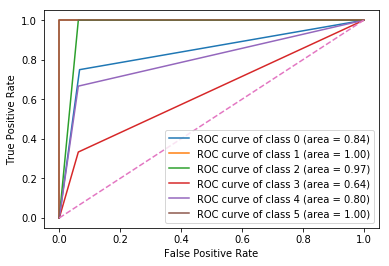

In [750]:
for i in range(y_test.nunique()):
    plt.plot(fpr[i],tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
         ''.format(i, roc_auc[i]))
plt.plot([0, 1],  ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

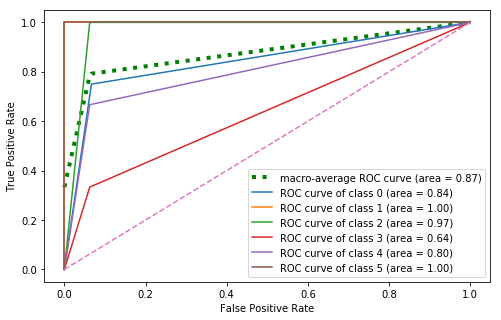

In [669]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range (y_test.nunique())]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test.nunique()):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test.nunique()

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = sklearn.metrics.auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue','black','yellow','red']
for i,color in zip (range (y_test.nunique()),colors):
    plt.plot(fpr[i],tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1],  ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [686]:
roc_auc

{0: 0.8416666666666667,
 1: 1.0,
 2: 0.96875,
 3: 0.6354166666666666,
 4: 0.8020833333333333,
 5: 1.0,
 'macro': 0.8746527777777777}

In [716]:
print('Test accuracy is {}'.format(sklearn.metrics.accuracy_score(preds,y_test)))

Test accuracy is 0.7894736842105263


# Using Navie Baye's Classifier for Classification

# Using Gaussian Prior

In [704]:
scores ={}
for i in range(len(normalized_multiclass_dataframes)):
    
    X_train_gaussian = normalized_multiclass_dataframes[i].iloc[:,:-1]
    y_train_gaussian = normalized_multiclass_dataframes[i].iloc[:,-1]
    gaussian_nb = GaussianNB()
    score = cross_val_score(gaussian_nb,X_train_gaussian,y_train_gaussian,cv=StratifiedKFold(5)).mean() # cross validation to determine the best score for each l
    scores[i+1] = score
    

In [705]:
scores

{1: 0.8778966131907306,
 2: 0.8798573975044561,
 3: 0.793048128342246,
 4: 0.8097147950089127,
 5: 0.7077540106951872,
 6: 0.7312834224598931,
 7: 0.7797682709447414,
 8: 0.7812834224598931,
 9: 0.6816399286987521,
 10: 0.6596256684491978,
 11: 0.6929590017825312,
 12: 0.6591800356506239,
 13: 0.6724598930481284,
 14: 0.6125668449197861,
 15: 0.5959001782531195,
 16: 0.6345811051693404,
 17: 0.5943850267379679,
 18: 0.5424242424242424,
 19: 0.5723707664884136,
 20: 0.5792335115864528}

# Finding best value of l

In [717]:
sorted(scores.items(),key = lambda x:x[1],reverse=True)[0]

(2, 0.8798573975044561)

# Best value of l = 2

In [723]:
X_train_gaussian =normalized_multiclass_dataframes[1].drop(['Activity'],axis =1) # using train set with twomsplits
y_train = normalized_multiclass_dataframes[1]['Activity']
model_gaussian_nb =GaussianNB().fit(X_train_gaussian,y_train) # fitting gaussian naive bayes classifier
preds_gaussian = model_gaussian_nb.predict(X_test_multiclass)

print(confusion_matrix(preds_gaussian,y_test))
print ('Accuracy score is {}'.format(sklearn.metrics.accuracy_score(preds_gaussian,y_test)))

[[4 0 0 3 0 0]
 [0 3 0 0 0 2]
 [0 0 3 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 1]]
Accuracy score is 0.6842105263157895


# Using Multinomial Prior in Naive Bayes Classifier

In [708]:
scores_multinomial ={}
for i in range(len(normalized_multiclass_dataframes)):
    
    X_train_gaussian = normalized_multiclass_dataframes[i].iloc[:,:-1]
    y_train_gaussian = normalized_multiclass_dataframes[i].iloc[:,-1]
    multinomial_nb = MultinomialNB()
    score = cross_val_score(multinomial_nb,X_train_gaussian,y_train_gaussian,cv=StratifiedKFold(5)).mean() # determining best l
    scores_multinomial[i+1] = score

In [709]:
scores_multinomial

{1: 0.7377005347593583,
 2: 0.7195187165775401,
 3: 0.6895721925133691,
 4: 0.6091800356506238,
 5: 0.7180035650623886,
 6: 0.6944741532976828,
 7: 0.7680035650623885,
 8: 0.7160427807486631,
 9: 0.727807486631016,
 10: 0.739572192513369,
 11: 0.6993761140819965,
 12: 0.727807486631016,
 13: 0.7160427807486631,
 14: 0.727807486631016,
 15: 0.7160427807486631,
 16: 0.727807486631016,
 17: 0.7160427807486631,
 18: 0.739572192513369,
 19: 0.727807486631016,
 20: 0.727807486631016}

In [710]:
sorted(scores_multinomial.items(),key = lambda x:x[1],reverse=True)[0]

(7, 0.7680035650623885)

best value of l=7

In [711]:
df_test_multinomial = split_data(7,test_data_files)
df_test_multinomial['Activity'].replace(d,inplace = True)

In [712]:
df_test_multinomial.head()

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_3,max_3,mean_3,min_4,...,min_40,max_40,mean_40,min_41,max_41,mean_41,min_42,max_42,mean_42,Activity
0,39.00,42.00,40.772206,0.00,1.00,0.506176,11.75,24.00,18.454706,0.0,...,0.0,3.27,0.632059,27.25,37.75,31.150588,0.00,1.50,0.373676,0
1,41.75,44.25,43.420294,0.43,0.94,0.559559,7.00,25.33,19.889559,0.0,...,0.0,5.72,1.545882,30.00,36.67,32.347059,0.00,1.50,0.337206,0
2,13.75,24.75,21.161765,0.00,4.92,0.959265,17.75,24.75,21.917353,0.0,...,0.0,2.69,0.505588,18.00,23.75,21.096471,0.00,1.66,0.641765,0
3,26.50,30.00,28.426324,0.00,0.94,0.086765,7.50,24.00,19.003088,0.0,...,0.0,4.64,1.106912,12.00,33.00,22.212941,0.00,6.68,1.908235,0
4,30.75,44.50,36.632353,0.00,6.18,2.370294,8.50,24.00,16.810588,0.0,...,0.0,7.26,2.673971,13.67,23.50,20.022941,0.43,8.17,2.684706,1


In [713]:
X_test_multinomial = df_test_multinomial.drop(['Activity'],axis =1)
y_test_multiomial = df_test_multinomial['Activity']
y_test_multiomial

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     2
8     2
9     2
10    3
11    3
12    3
13    4
14    4
15    4
16    5
17    5
18    5
Name: Activity, dtype: int64

In [724]:
X_train_multinomial =normalized_multiclass_dataframes[6].drop(['Activity'],axis =1)
y_train_multinomial = normalized_multiclass_dataframes[6]['Activity']
model_multinomial_nb =MultinomialNB().fit(X_train_multinomial,y_train_multinomial)
preds_multinomial = model_multinomial_nb.predict(X_test_multinomial)
print(preds_multinomial)
print(confusion_matrix(preds_multinomial,y_test_multiomial))
print ('Accuracy is {}'.format(sklearn.metrics.accuracy_score(preds_multinomial,y_test_multiomial)))

[0 0 0 4 4 4 4 2 2 2 4 4 2 2 2 4 4 4 4]
[[3 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 3 1 2 0]
 [0 0 0 0 0 0]
 [1 3 0 2 1 3]
 [0 0 0 0 0 0]]
Accuracy is 0.3684210526315789


# In this case gaussian Naive Bayes Classifier performs better than Multinomial Naive Bayes Classifier

# Overall performance of multiclass classification of l1 regularized logistic was the best as it reported a test accuracy 78.94%
